In [10]:
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import sys
sys.path.append("../")

from unique_hypercube_size import *

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create Graphs

In [146]:
filename = ""
with open(filename,'r') as f:
    cap_data = pickle.load(f)


filename = "mean_ratio.p"
with open(filename,'r') as f:
    mean_ratio = pickle.load(f)


In [147]:




num_locs_total = 5**(2*np.arange(1,m_max+1))


valid = (mean_rad.astype(int)>=1)



valid_vol = np.zeros((m_max,k_max))
for m in range(m_max):
    for k in range(k_max):
        if k+1 < 2*(m+1):
            valid_vol[m,k] = 1.

valid_vol = valid_vol.astype(bool)



num_locs = np.zeros((m_max, k_max))
for i in range(k_max):
    num_locs[:,i] = mean_vol[:, i]*locs_in_vol[:,i]

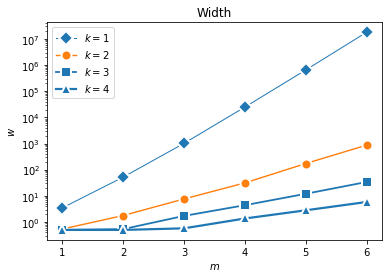

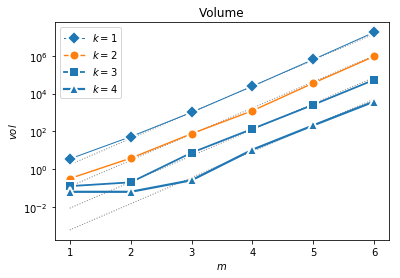

 ---------------- 


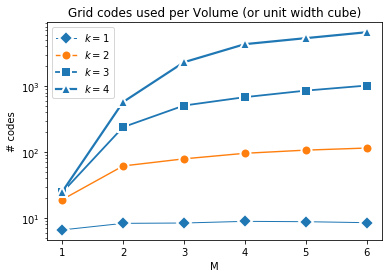

 
The asymptotic behaviou makes sense, 
because the scales increase if we add more modules. 
However, bigger modules don't change for locations 
within a unit cube.

 ---------------- 


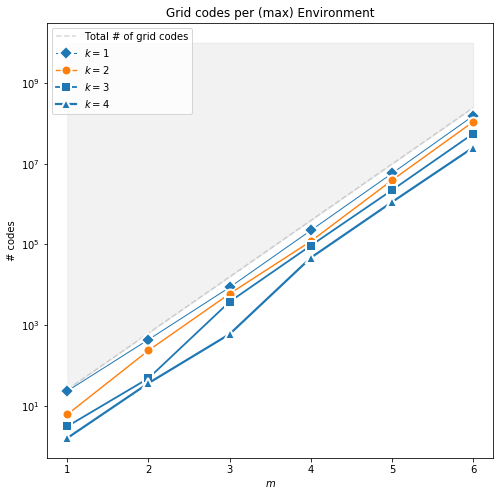

 
The gray area can't be reached. The dashed line
indicates the maximal possible number, i.e. the
total number of grid codes.

 ---------------- 


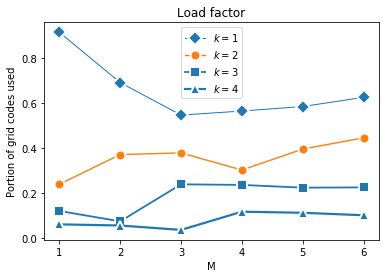

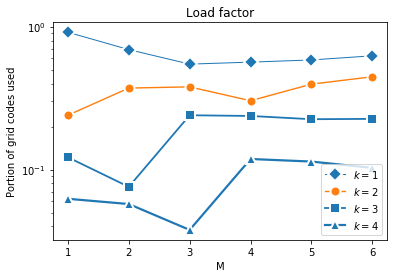

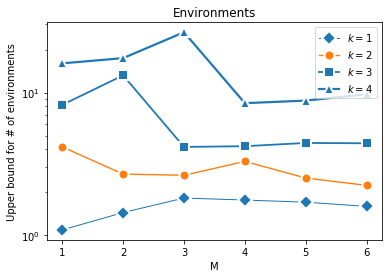

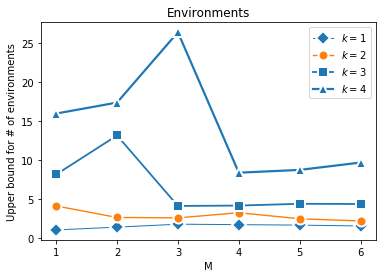

In [148]:
marker = ["X", "P", "^", "s", "o", "D"][::-1]

plt.title("Width")
plt.yscale("log")
plt.xticks(ms)
plt.xlabel("$m$")
plt.ylabel("$w$")
for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"
    plt.plot(ms, mean_rad[:, i], 
             marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.show()

plt.title("Volume")
plt.yscale("log")
plt.xticks(ms)
plt.xlabel("$m$")
plt.ylabel("$vol$")
for i in range(k_max):
    plt.plot(ms, inferred_vol[:, i], 
             c="gray", 
             markeredgewidth=2,
             markersize=10,
             linestyle=":",
             linewidth=1,
             markeredgecolor="white") 
    
    
    c = "C1" if i+1 ==2 else "C0"
    plt.plot(ms, mean_vol[:, i], 
             marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
    
  


plt.legend()
plt.show()


print " ---------------- "


plt.title("Grid codes used per Volume (or unit width cube)")
plt.yscale("log")
for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"
    plt.plot(np.arange(1,m_max+1), locs_in_vol[:,i],
             marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.xlabel("M")
plt.ylabel("# codes")
plt.show()

print "" +\
""" 
The asymptotic behaviou makes sense, 
because the scales increase if we add more modules. 
However, bigger modules don't change for locations 
within a unit cube.
"""
print " ---------------- "

plt.figure(figsize=(8,8))
plt.title("Grid codes per (max) Environment")
plt.yscale("log")
plt.xticks(ms)
plt.xlabel("$m$")
plt.ylabel("# codes")



# print "Only showing datapoints if the environment width is >=1."
# print "Number of locations is computed via: vol * (locs/vol)"

plt.fill_between(ms, num_locs_total, 10**10, color="gray", alpha=0.1)
plt.plot(ms, num_locs_total, c="gray", linestyle="--",alpha=0.3, label="Total # of grid codes")

for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"

#     plt.plot(np.arange(1, m_max+1)[valid[:,i]],num_locs[:,i][valid[:,i]], 
    plt.plot(np.arange(1, m_max+1),num_locs[:,i], 
             marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))

plt.legend()
plt.show()

print "" +\
""" 
The gray area can't be reached. The dashed line
indicates the maximal possible number, i.e. the
total number of grid codes.
"""
print " ---------------- "


plt.title("Load factor")
for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"
    plt.plot(np.arange(1,m_max+1), num_locs[:,i]/num_locs_total, 
            marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.xlabel("M")
plt.ylabel("Portion of grid codes used")
plt.show()

plt.title("Load factor")
plt.yscale("log")
for i in range(k_max):
    fx = num_locs[:,i]/num_locs_total
    c = "C1" if i+1 ==2 else "C0"
#     plt.plot(np.arange(1,m_max+1)[valid[:,i]],locs_in_vol[:,i][valid[:,i]]/num_locs_total[valid[:,i]], 
    plt.plot(np.arange(1,m_max+1), fx, 
             marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.xlabel("M")
plt.ylabel("Portion of grid codes used")
plt.show()



plt.title("Environments")
plt.yscale("log")
for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"
#     plt.plot(np.arange(1,m_max+1)[valid[:,i]],num_locs_total[valid[:,i]]/locs_in_vol[:,i][valid[:,i]], 
    plt.plot(np.arange(1,m_max+1),num_locs_total/num_locs[:,i],
             marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.xlabel("M")
plt.ylabel("Upper bound for # of environments")
plt.show()


plt.title("Environments")
for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"
#     plt.plot(np.arange(1,m_max+1)[valid[:,i]],num_locs_total[valid[:,i]]/locs_in_vol[:,i][valid[:,i]], 
    plt.plot(np.arange(1,m_max+1),num_locs_total/num_locs[:,i],
             marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.xlabel("M")
plt.ylabel("Upper bound for # of environments")
plt.show()








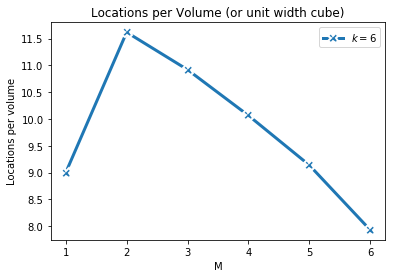

In [15]:
plt.title("Locations per Volume (or unit width cube)")

# plt.yscale("log")
c = "C1" if i+1 ==2 else "C0"
plt.plot(np.arange(1,k_max+1), locs_in_vol[4,:]**(1./np.arange(1,k_max+1)),
             marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.xlabel("M")
plt.ylabel("Locations per volume")
plt.show()



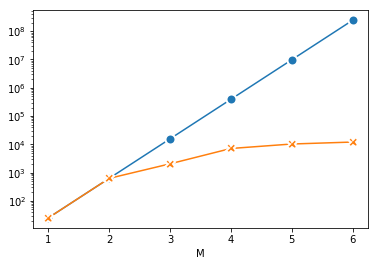

In [23]:
plt.yscale("log")

k=3

plt.plot(np.arange(1,m_max+1), num_locs_total, 
            marker="o", 
             markeredgewidth=2,
             markersize=10,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.plot(np.arange(1,m_max+1), locs_in_vol[:,k], 
            marker="X", 
             markeredgewidth=2,
             markersize=10,
             markeredgecolor="white",
             label="$k={}$".format(i+1))

plt.xlabel("M")
plt.show()

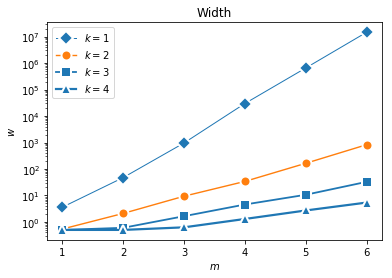

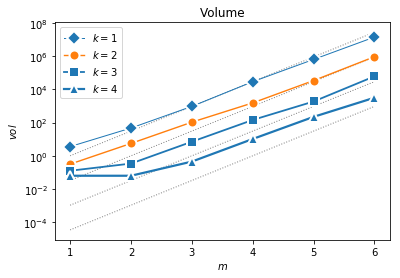

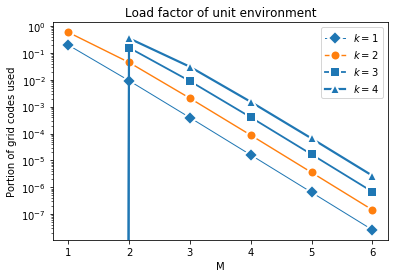

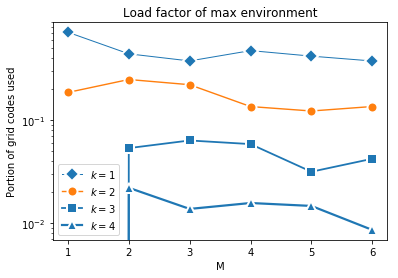

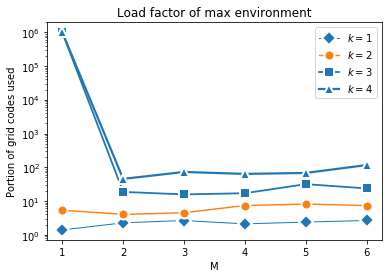

In [29]:
marker = ["X", "P", "^", "s", "o", "D"][::-1]

plt.title("Width")
plt.yscale("log")
plt.xticks(ms)
plt.xlabel("$m$")
plt.ylabel("$w$")
for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"
    plt.plot(ms, mean_rad[:, i], 
             marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.show()

plt.title("Volume")
plt.yscale("log")
plt.xticks(ms)
plt.xlabel("$m$")
plt.ylabel("$vol$")
for i in range(k_max):
    plt.plot(ms, inferred_vol[:, i], 
             c="gray", 
             markeredgewidth=2,
             markersize=10,
             linestyle=":",
             linewidth=1,
             markeredgecolor="white") 
    
    
    c = "C1" if i+1 ==2 else "C0"
    plt.plot(ms, mean_vol[:, i], 
             marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
    
plt.legend()
plt.show()




plt.yscale("log")
plt.title("Load factor of unit environment")
for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"
    plt.plot(np.arange(1,m_max+1), np.mean(load_factor[:,i,:], axis=1), 
            marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.xlabel("M")
plt.ylabel("Portion of grid codes used")
plt.show()





plt.yscale("log")
plt.title("Load factor of max environment")
for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"
    plt.plot(np.arange(1,m_max+1), np.mean(load_factor[:,i,:], axis=1)*mean_vol[:, i], 
            marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.xlabel("M")
plt.ylabel("Portion of grid codes used")
plt.show()


plt.yscale("log")
plt.title("Load factor of max environment")
for i in range(k_max):
    c = "C1" if i+1 ==2 else "C0"
    plt.plot(np.arange(1,m_max+1), 1./np.maximum(np.mean(load_factor[:,i,:], axis=1)*mean_vol[:, i], 0.000001) , 
            marker=marker[i], 
             c=c, 
             markeredgewidth=2,
             markersize=10,
             linewidth=1 + (i)*0.4,
             markeredgecolor="white",
             label="$k={}$".format(i+1))
plt.legend()
plt.xlabel("M")
plt.ylabel("Portion of grid codes used")
plt.show()